 ***Simple Linear Regression***


**Importing the libraries**

pandas - to import data

sklearn - scikit learn is an ML library (here it is used for Linear regression)

matplotlib - for data and result visualizations as plots

sns - for data visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as TS
from sklearn.linear_model import LinearRegression as LR

**Importing the dataset**

The dataset is imported from the link provided.

Then, the dataset is split into Independent Variable (X) and Dependent Varible (y) ; and reshaped.

In [ ]:
data = pd.read_csv("http://bit.ly/w-data", sep = ',')
data.head(5)

X = data["Hours"]
y = data["Scores"]

X = np.array(X).reshape((-1, 1))
y = np.array(y)

**Information and statistics measures  about the Data:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Plotting the data to view some Visualizations**

Done with help of Pairplot and Heatmap using 'seaborn' libraries

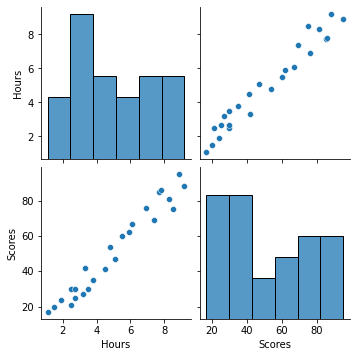

In [ ]:
sns.pairplot(data)

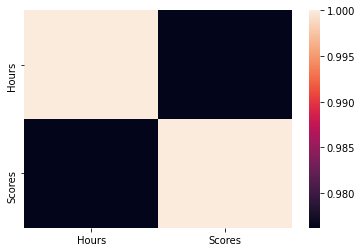

In [ ]:
sns.heatmap(data.corr())    #printing correlation values using heatmap 

**Linear Regression model training on the Training set**

To train the training set, we use SIMPLE LINEAR REGRESSION MODEL since the data contains only 2 variables, X and y for summarizing their relationship.

In [ ]:
X_train, X_test, y_train, y_test = TS(X, y, test_size = 0.25, random_state = 0)

In [ ]:
regressor = LR()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = regressor.score(X_train, y_train)
print("Coeffecient of Determination : ", r_sq)
print("Intercept                    : ", regressor.intercept_)
print('Slope                        : ', ''.join(map(str, regressor.coef_)))

Coeffecient of Determination :  0.9484509249326872
Intercept                    :  1.9322042531516601
Slope                        :  9.941678339488094


Here, ''.join(map()) is used to remove the square brackets ; since join is a method from string, we convert the output to string and then print it.

**Predicting the Test set results**

With the help of the instance created for the model, we can predict the results for the test set or any new X - value given

In [ ]:
y_predict = regressor.predict(X_test)

print('The Predicted Score for student who studies 9.25 hrs/day :', ''.join(map(str, regressor.predict([[9.25]]))))

The Predicted Score for student who studies 9.25 hrs/day : 93.89272889341652


With help of metrices we can calculate the mean squared error and mean absolute error for evaluation purposes.

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 4.130879918502482
MSE: 20.33292367497996
RMSE: 4.509204328368805


**Visualizing the Training set results:**

Here, we can Scatter Plot the Actual Datapoints and plot the Regression line of Simple Linear Regression model.

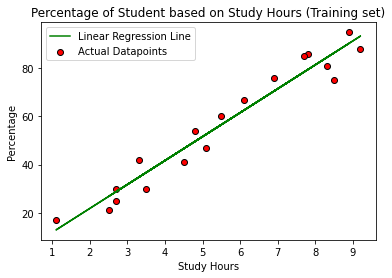

In [ ]:
plt.scatter(X_train, y_train, color = 'red', edgecolors = 'black')
plt.plot(X_train, regressor.predict(X_train), color = 'green')

plt.title('Percentage of Student based on Study Hours (Training set)')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')

plt.legend(["Linear Regression Line", "Actual Datapoints"], loc = "upper left")
plt.show()

**Visualizing the Test set results:**

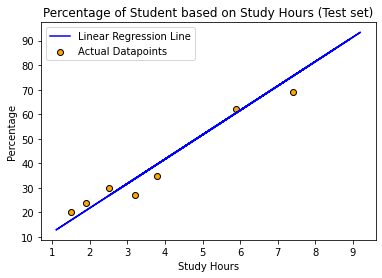

In [ ]:
plt.scatter(X_test, y_test, color = 'orange', edgecolors="black")
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Percentage of Student based on Study Hours (Test set)')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')

plt.legend(["Linear Regression Line", "Actual Datapoints"], loc = "upper left")
plt.show()


From both the Visualizations, we can see that most of the datapoints are very close to the regression line.

The actual values have slight residuals while very few data points are farther from the regression line indicating they have more residual values.